# Plot Map

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

meanSlewRate = 4.04 # deg/sec

In [156]:
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
import matplotlib.pyplot as plt

def plot_sphere_proj(df):
    """
    Plots sky brightness as a function of azimuth and elevation using 
    an azimuthal equidistant projection.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Az', 'Alt', and 'current_mean' columns.
    """
    
    # Create figure and axes with polar projection
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

    # Convert Azimuth to radians
    azimuth_rad = np.deg2rad(df['Az'])

    # Plot brightness as a scatter in polar coordinates (azimuth, altitude)
    sc = ax.scatter(azimuth_rad, df['Alt'], c=np.log10(np.abs(df['current_mean'])*6.28e18), cmap='plasma', s=500)

    # Customize plot
    plt.colorbar(sc, label=r'Sky Brightness $[log(e^- / sec)]$')
    ax.set_theta_zero_location('N')  # North at the top
    ax.set_theta_direction(-1)       # Clockwise direction
    ax.set_xlabel('Azimuth (Az)')
    ax.set_ylabel('Elevation (Alt)')
    t0 = df['local_time'].iloc[0]
    tend = df['local_time'].iloc[-1]
    plt.title(f"Polar Proj, Sky Brightness \n Sep 26 from {t0} to {tend}")
    
    # Show the plot
    plt.tight_layout()
    plt.savefig('polar_map_sky_brightness_test26Sep_outside_auxtel_dome_360deg',dpi=120)

# Example usage:
# plot_sphere_proj(df)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def plot_2d_surface(df):
    """
    Plots sky brightness as a 2D surface plot (Alt vs Az) using nearest interpolation.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Az', 'Alt', and 'current_mean' columns.
    """
    
    # Create a grid for the interpolation
    grid_x, grid_y = np.mgrid[df['Az'].min()-5:df['Az'].max()*1.1:200j, 
                              df['Alt'].min()-5:df['Alt'].max()*1.1:100j]

    # Interpolate the data using nearest neighbor method
    grid_z = griddata((df['Az'], df['Alt']), np.log10(np.abs(df['current_mean'])*6.28e18), 
                      (grid_x, grid_y), method='nearest')

    # Create the figure and axis
    plt.figure(figsize=(8, 6))

    # Plot the interpolated surface
    plt.imshow(grid_z.T, extent=(df['Az'].min()-5, df['Az'].max()*1.1, 
                                 df['Alt'].min()-5, df['Alt'].max()*1.1),
               origin='lower', aspect='auto', cmap='plasma', interpolation='nearest')
    # Add labels and title
    plt.xlabel('Azimuth (Az)')
    plt.ylabel('Elevation (Alt)')
    t0 = df['local_time'].iloc[0]
    tend = df['local_time'].iloc[-1]
    plt.title(f"Sky Brightness \n Sep 26 from {t0} to {tend}")
    plt.plot(df['Az'], df['Alt'], 'kx', markersize=10)
    
    # Add colorbar for brightness levels
    plt.colorbar(label=r'Sky Brightness  $[e^- / sec]$')
    

    # Show the plot
    plt.tight_layout()
    plt.savefig('map_sky_brightness_test26Sep_outside_auxtel_dome_360deg',dpi=120)

# Example usage:
# plot_2d_surface(df)


In [362]:
g_time1 = ['2024-10-01 19:51:19.424716-03:00','2024-10-01 19:58:14.430811-03:00']
g_time2 = ['2024-10-01 20:06:06.219514-03:00', '2024-10-01 20:17:57.426482-03:00']
g_time3 = ['2024-10-01 20:21:01.721517-03:00', '2024-10-01 20:34:16.800326-03:00']

def make_slice(df, timeCut):
    return df[(df['chilean_time'] > timeCut[0])&(df['chilean_time']<timeCut[1])&(df['flag']==False)].copy()


In [363]:
import pytz
import pandas as pd

date = '20241001'
fname = f'../DATA/{date[:-2]}/{date}.csv'

df = pd.read_csv(fname)

df['logMean'] = np.log10(np.abs(df['current_mean']))
df.logMean.describe()

# Convert the string to a datetime object
df['timestamp'] = pd.to_datetime(df['date'], utc=True)

# Define the Chilean timezone
chile_tz = pytz.timezone('America/Santiago')

# Convert the UTC timestamp to Chilean local time
df['chilean_time'] = df['timestamp'].dt.tz_convert(chile_tz)

# Format the Chilean local time to 'HH:MM am/pm'
df['local_time'] = df['chilean_time'].dt.strftime('%I:%M %p')

In [364]:
g1 = make_slice(df, g_time1)
g2 = make_slice(df, g_time2)
g3 = make_slice(df, g_time3)

In [383]:
g1.iloc[:6*3]

,tmid,date,seq_id,exp_time_cmd,exp_time,filter,Alt,Az,current_mean,current_std,...,az_std,alt_rank,az_rank,electrometer_filename,flag,mount_filename,logMean,timestamp,chilean_time,local_time
1,20241001225123,2024-10-01 22:51:23.791927,2,NaN,0.929796,Empty,80.70189,-0.10940,-7.991110e-07,6.219951e-09,...,NaN,2,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.097393,2024-10-01 22:51:23.791927+00:00,2024-10-01 19:51:23.791927-03:00,07:51 PM
2,20241001225128,2024-10-01 22:51:28.197946,3,NaN,0.929905,Empty,70.22856,0.00000,-9.915490e-07,1.184780e-08,...,NaN,3,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.003686,2024-10-01 22:51:28.197946+00:00,2024-10-01 19:51:28.197946-03:00,07:51 PM
3,20241001225132,2024-10-01 22:51:32.598968,4,NaN,0.929787,Empty,61.13721,0.00008,-1.335877e-06,2.258671e-08,...,NaN,4,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,-5.874234,2024-10-01 22:51:32.598968+00:00,2024-10-01 19:51:32.598968-03:00,07:51 PM
4,20241001225137,2024-10-01 22:51:37.012439,5,NaN,0.930232,Empty,52.18698,0.00000,-1.978800e-06,4.208113e-08,...,NaN,5,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,-5.703598,2024-10-01 22:51:37.012439+00:00,2024-10-01 19:51:37.012439-03:00,07:51 PM
5,20241001225141,2024-10-01 22:51:41.207095,6,NaN,0.929155,Empty,41.71776,0.00000,-3.106780e-06,9.696473e-08,...,NaN,6,1,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,-5.507689,2024-10-01 22:51:41.207095+00:00,2024-10-01 19:51:41.207095-03:00,07:51 PM
7,20241001225206,2024-10-01 22:52:06.110643,8,NaN,0.929298,Empty,81.54106,-29.86091,-6.884440e-07,3.619639e-09,...,NaN,1,2,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.162131,2024-10-01 22:52:06.110643+00:00,2024-10-01 19:52:06.110643-03:00,07:52 PM
8,20241001225210,2024-10-01 22:52:10.475074,9,NaN,0.929777,Empty,72.43004,-29.86091,-7.931700e-07,6.407455e-09,...,NaN,2,2,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.100634,2024-10-01 22:52:10.475074+00:00,2024-10-01 19:52:10.475074-03:00,07:52 PM
9,20241001225214,2024-10-01 22:52:14.862257,10,NaN,0.929872,Empty,63.66400,-29.86091,-9.795650e-07,1.167368e-08,...,NaN,3,2,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.008967,2024-10-01 22:52:14.862257+00:00,2024-10-01 19:52:14.862257-03:00,07:52 PM
10,20241001225219,2024-10-01 22:52:19.255555,11,NaN,0.931361,Empty,52.89402,-29.86091,-1.307229e-06,2.080913e-08,...,NaN,4,2,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,-5.883648,2024-10-01 22:52:19.255555+00:00,2024-10-01 19:52:19.255555-03:00,07:52 PM
11,20241001225223,2024-10-01 22:52:23.645639,12,NaN,0.930475,Empty,43.64630,-29.86091,-1.862483e-06,3.615248e-08,...,NaN,5,2,/home/estevesjh/Documents/twilightMonitor/DATA...,False,/home/estevesjh/Documents/twilightMonitor/DATA...,-5.729908,2024-10-01 22:52:23.645639+00:00,2024-10-01 19:52:23.645639-03:00,07:52 PM


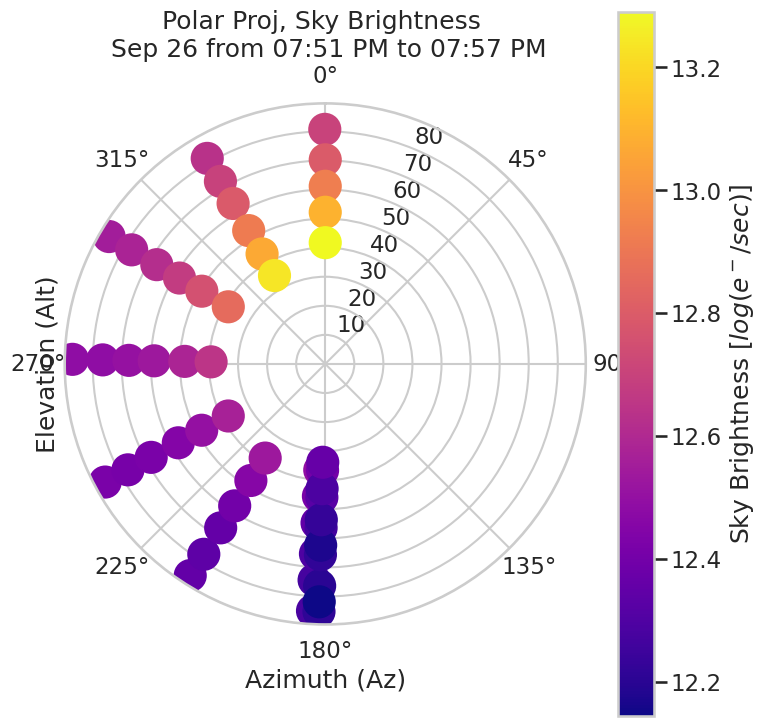

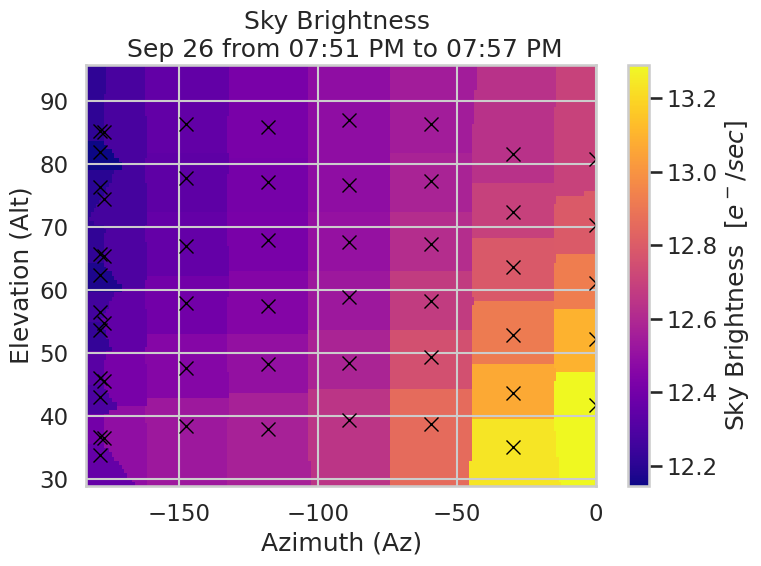

In [366]:
plot_sphere_proj(g1)
plot_2d_surface(g1)


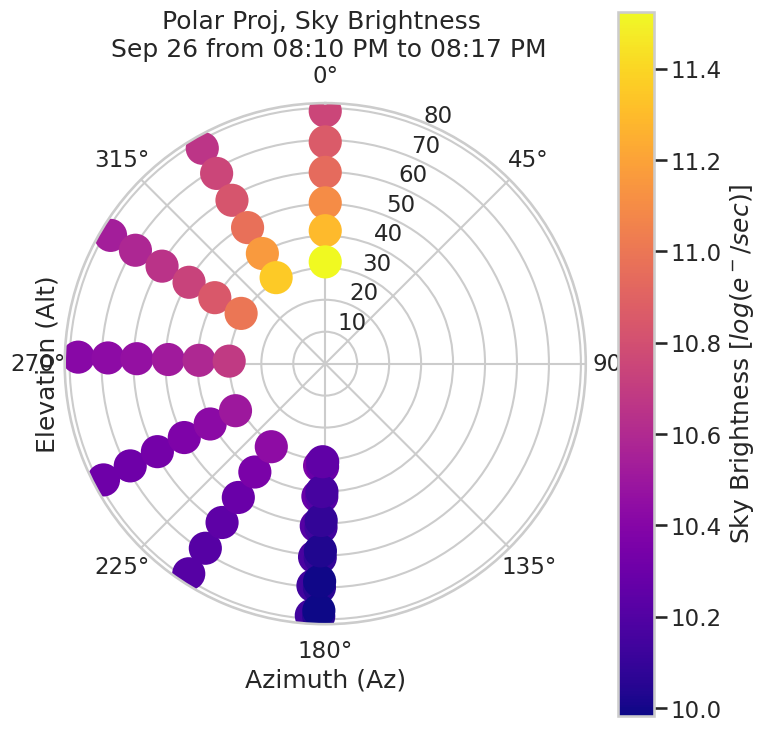

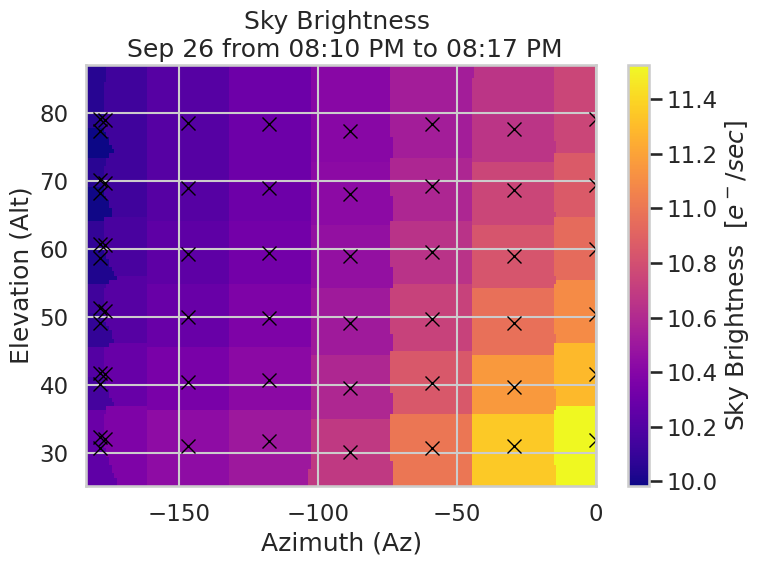

In [367]:
plot_sphere_proj(g2)
plot_2d_surface(g2)


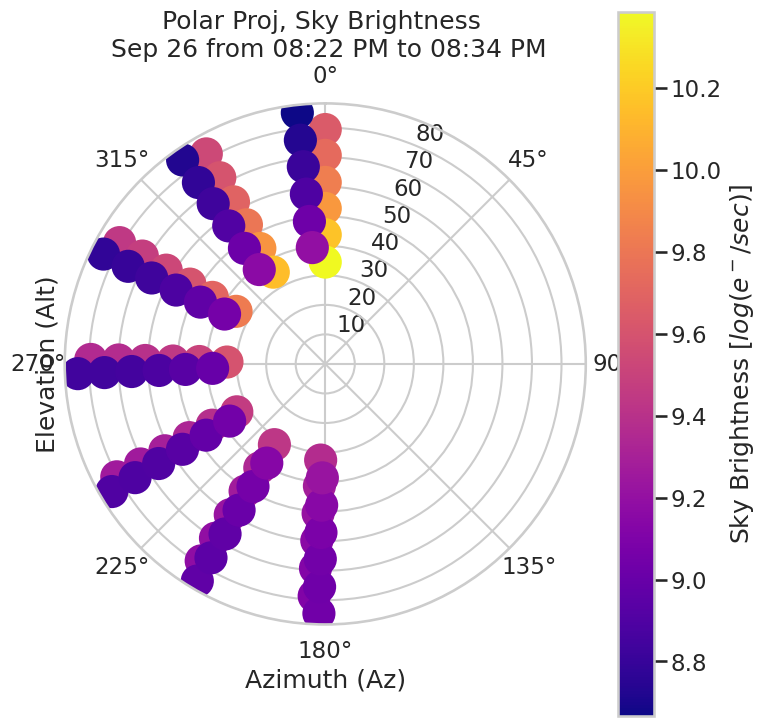

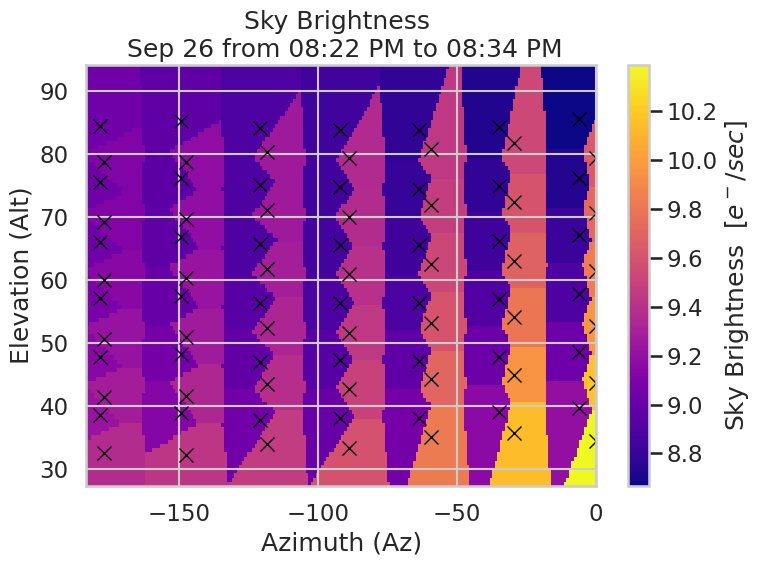

In [368]:
plot_sphere_proj(g3)
plot_2d_surface(g3)


## Elevation Gradient

In [369]:
# Time-Scale Initial Guess
t0 = g1.chilean_time.iloc[0] # timestamp


In [ ]:
# Model
# A*exp(-(t-t0)/tau)
f0 = 4.59e12 # electrons per sec
pars = np.array([4.79380076, 0.98968839])
fluxesExpected = f0*popt[1]*np.exp(-(times/popt[0]))


Text(0, 0.5, 'flux [$e^-/sec$]')

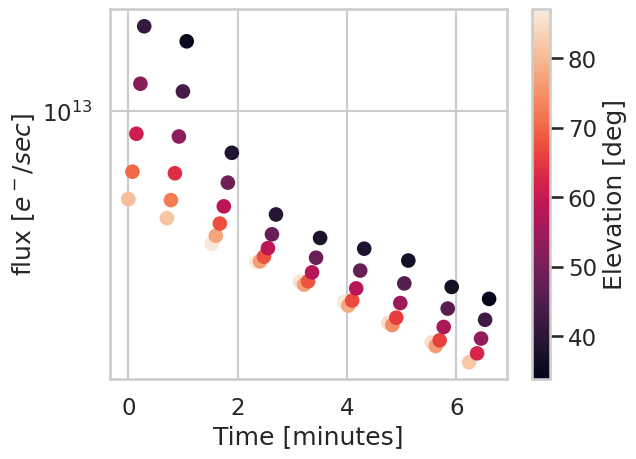

In [380]:
# time correction
times = np.array([(g1['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g1))])/60
fluxes = np.array(np.abs(g1['current_mean'].to_numpy())*6.28e18)
el = g1.Alt.to_numpy()

plt.yscale('log')
plt.scatter(times, fluxes, c=el)

plt.colorbar().set_label('Elevation [deg]')
plt.xlabel('Time [minutes]')
plt.ylabel('flux [$e^-/sec$]')

Text(0, 0.5, 'flux [$e^-/sec$]')

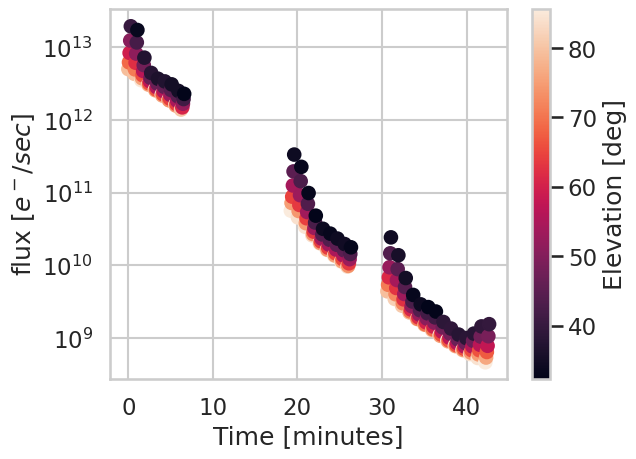

In [378]:
# time correction
times = np.array([(g1['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g1))])/60
fluxes = np.array(np.abs(g1['current_mean'].to_numpy())*6.28e18)
el = g1.Alt.to_numpy()

plt.yscale('log')
plt.scatter(times, fluxes, c=el)

# time correction
times = np.array([(g2['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g2))])/60
fluxes = np.array(np.abs(g2['current_mean'].to_numpy())*6.28e18)
el = g2.Alt.to_numpy()

plt.scatter(times, fluxes, c=el)

# time correction
times = np.array([(g3['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g3))])/60
fluxes = np.array(np.abs(g3['current_mean'].to_numpy())*6.28e18)
el = g3.Alt.to_numpy()

plt.scatter(times, fluxes, c=el)

plt.colorbar().set_label('Elevation [deg]')
plt.xlabel('Time [minutes]')
plt.ylabel('flux [$e^-/sec$]')

Text(0, 0.5, 'flux [$e^-/sec$]')

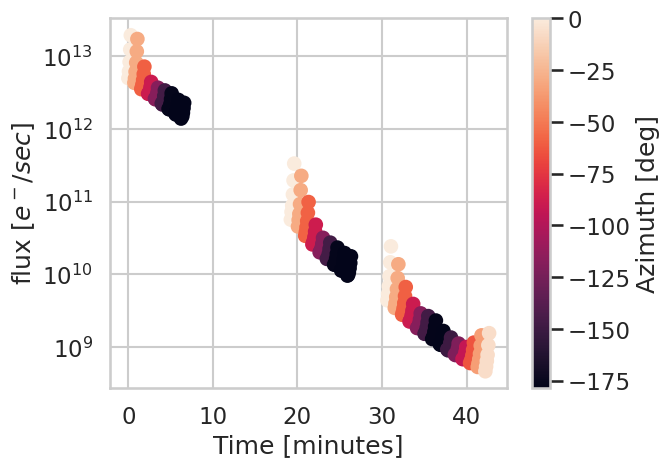

In [379]:
# time correction
times = np.array([(g1['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g1))])/60
fluxes = np.array(np.abs(g1['current_mean'].to_numpy())*6.28e18)
el = g1.Az.to_numpy()

plt.yscale('log')
plt.scatter(times, fluxes, c=el)

# time correction
times = np.array([(g2['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g2))])/60
fluxes = np.array(np.abs(g2['current_mean'].to_numpy())*6.28e18)
el = g2.Az.to_numpy()

plt.scatter(times, fluxes, c=el)

# time correction
times = np.array([(g3['chilean_time'].iloc[i]-t0).total_seconds() for i in range(len(g3))])/60
fluxes = np.array(np.abs(g3['current_mean'].to_numpy())*6.28e18)
el = g3.Az.to_numpy()

plt.scatter(times, fluxes, c=el)

plt.colorbar().set_label('Azimuth [deg]')
plt.xlabel('Time [minutes]')
plt.ylabel('flux [$e^-/sec$]')


In [ ]:
# Model
# A*exp(-(t-t0)/tau)
f0 = 4.59e12 # electrons per sec
pars = np.array([4.79380076, 0.98968839])
fluxesExpected = f0*popt[1]*np.exp(-(times/popt[0]))


## Time-Scale Analysis on Pointings

## Analysis on Continous Exposures

In [22]:
continousSlew = df[(df['flag']==True)&(df['alt_rank']==0)]
continousSlew

,tmid,date,seq_id,exp_time_cmd,exp_time,filter,Alt,Az,current_mean,current_std,...,az_std,alt_rank,az_rank,electrometer_filename,flag,mount_filename,logMean,timestamp,chilean_time,local_time
6,20241001225153,2024-10-01 22:51:53.388731,7,11.443371,11.647645,Empty,86.50361,0.00000,-1.541434e-06,8.385415e-07,...,NaN,0,1,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-5.812075,2024-10-01 22:51:53.388731+00:00,2024-10-01 19:51:53.388731-03:00,07:51 PM
13,20241001225242,2024-10-01 22:52:42.708351,14,14.019064,14.344337,Empty,89.73080,-29.86091,-1.282693e-06,7.299845e-07,...,NaN,0,2,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-5.891877,2024-10-01 22:52:42.708351+00:00,2024-10-01 19:52:42.708351-03:00,07:52 PM
20,20241001225331,2024-10-01 22:53:31.122484,21,12.951113,13.218229,Empty,87.51453,-59.48907,-7.309708e-07,2.129038e-07,...,NaN,0,3,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.136100,2024-10-01 22:53:31.122484+00:00,2024-10-01 19:53:31.122484-03:00,07:53 PM
27,20241001225419,2024-10-01 22:54:19.539531,28,12.903136,13.207143,Empty,89.78486,-88.96017,-5.259535e-07,8.875353e-08,...,NaN,0,4,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.279053,2024-10-01 22:54:19.539531+00:00,2024-10-01 19:54:19.539531-03:00,07:54 PM
34,20241001225507,2024-10-01 22:55:07.956092,35,12.964925,13.207833,Empty,88.67459,-118.22787,-4.357141e-07,7.270410e-08,...,NaN,0,5,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.360798,2024-10-01 22:55:07.956092+00:00,2024-10-01 19:55:07.956092-03:00,07:55 PM
41,20241001225556,2024-10-01 22:55:56.357803,42,12.983855,13.208364,Empty,89.03024,-147.46508,-3.819228e-07,7.713559e-08,...,NaN,0,6,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.418024,2024-10-01 22:55:56.357803+00:00,2024-10-01 19:55:56.357803-03:00,07:55 PM
48,20241001225645,2024-10-01 22:56:45.266586,49,13.467821,13.714752,Empty,89.53258,-177.04733,-3.351099e-07,7.650156e-08,...,NaN,0,7,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.474813,2024-10-01 22:56:45.266586+00:00,2024-10-01 19:56:45.266586-03:00,07:56 PM
55,20241001225732,2024-10-01 22:57:32.482161,56,13.092783,13.309871,Empty,88.23133,-178.55313,-2.796617e-07,5.930820e-08,...,NaN,0,7,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.553367,2024-10-01 22:57:32.482161+00:00,2024-10-01 19:57:32.482161-03:00,07:57 PM
62,20241001225814,2024-10-01 22:58:14.430811,63,13.937314,14.241407,Empty,89.69199,-178.55313,-2.464024e-07,5.725169e-08,...,NaN,0,6,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.608355,2024-10-01 22:58:14.430811+00:00,2024-10-01 19:58:14.430811-03:00,07:58 PM
73,20241001230516,2024-10-01 23:05:16.938817,74,15.615656,15.990919,Empty,84.61928,0.00000,-1.091609e-07,9.634388e-08,...,NaN,0,1,/home/estevesjh/Documents/twilightMonitor/DATA...,True,/home/estevesjh/Documents/twilightMonitor/DATA...,-6.961933,2024-10-01 23:05:16.938817+00:00,2024-10-01 20:05:16.938817-03:00,08:05 PM


In [30]:
eFiles = [continousSlew.electrometer_filename.iloc[i] for i in range(len(continousSlew))]
eAzs = [continousSlew.Az.iloc[i] for i in range(len(continousSlew))]
eDatas = []
for efile in eFiles:
    eDatas.append(np.load(efile))

In [36]:
def convert_time_to_angle(data, az0, azend):
    time = data['time']
    angle = az0+data['time']*meanSlewRate
    return angle

def plot_eFile(data,az=0,ax=None, is_label=True):
    if ax is None: ax = plt.gca()
    elec = 6.28e18*np.abs(data['CURR'])
    ax.plot(data['time'],elec)
    if is_label:
        ax.set_ylabel('Flux $[e^-/sec]$')
        ax.set_xlabel('Time [seconds]')

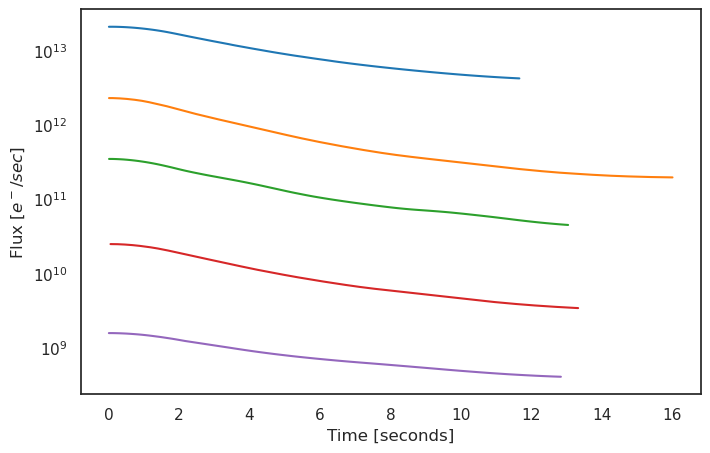

In [44]:
fig, axs = plt.subplots(1,1,figsize=(8,5))
for i in range(len(eDatas)):
    if np.abs(eAzs[i])<10:
        plot_eFile(eDatas[i],ax=axs)
axs.set_yscale('log')

### Rough Convertion to Angle

In [279]:
def convert_time_to_angle(data, az0, azend):
    time = data['time']
    angle = az0+data['time']*meanSlewRate
    return angle

# continousSlew.index
eAltStart = [df.Alt.iloc[i-1] for i in continousSlew.index]
eAltEnd = [df.Alt.iloc[i] for i in continousSlew.index]
eDates = [df.chilean_time.iloc[i] for i in continousSlew.index]
continous = []
for edata, el0, ele, az, d in zip(eDatas,eAltStart, eAltEnd, eAzs, eDates):
    out = dict().fromkeys(['angle','time','flux','az'])
    if az<=-45:
        angle = convert_time_to_angle(edata, el0, ele)
        out['angle'] = angle
        out['time'] = edata['time']
        out['flux'] = np.abs(edata['CURR'])*6.28e18
        out['az'] = az
        out['date'] = d
        continous.append(out)


In [280]:
def plot_continous_slew(data, az=0, ax=None, is_label=True):
    if ax is None:
        ax = plt.gca()
    
    # Calculate flux (electrons per second) from current
    elec = data['flux']
    
    t0 = data['date'].strftime('%I:%M %p')
    # Plot flux vs time on the bottom axis
    ax.plot(data['angle'], elec, label=f'{t0}')
    
    if is_label:
        ax.set_ylabel('Flux $[e^-/sec]$')
        ax.set_xlabel('Angle [deg]')

    # Return the axis objects in case further customization is needed
    return ax

(100000000.0, 10000000000000.0)

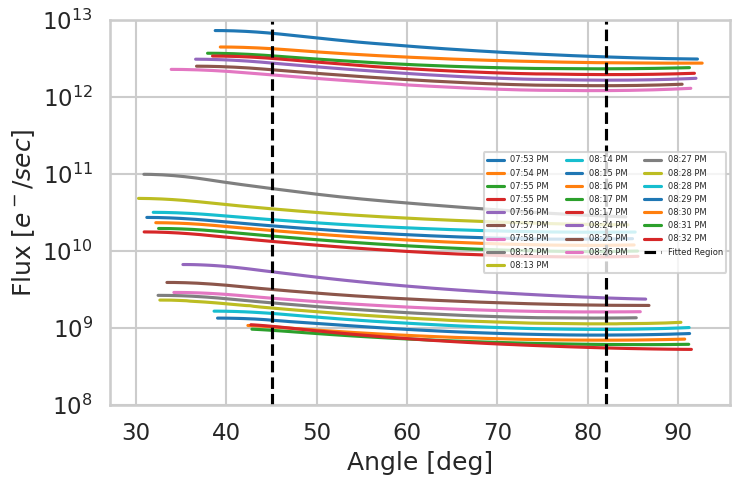

In [300]:
fig, axs = plt.subplots(1,1,figsize=(8,5))
for i in range(len(continous)):
    if np.abs(continous[i]['az'])>50:
        plot_continous_slew(continous[i], ax=axs)
axs.set_yscale('log')
axs.axvline(45, color='k', linestyle='--', label='Fitted Region')
axs.axvline(82, color='k', linestyle='--')
axs.legend(ncols=3,fontsize=6)
axs.set_ylim(1e8, 1e13)

In [ ]:
aLow, aEnd = 45, 83
angleVec = np.linspace(aLow, aEnd, 40)
def interFlux(data):
    return np.interp(angleVec, data['angle'], data['flux'])

# prepare data
x = np.array([(continous[i]['date']-continous[0]['date']).total_seconds() for i in range(len(continous)-1)])
y = np.array([np.mean(interFlux(continous[i])/interFlux(continous[0])) for i in range(len(continous)-1)])
yErr = np.array([np.std(interFlux(continous[i])/interFlux(continous[0])) for i in range(len(continous)-1)])

In [282]:
from scipy.optimize import curve_fit
# Define the exponential decay function
def exp_decay(t, tau, a):
    return a*np.exp(-t / tau)

# Perform the fit with curve_fit, using fluxErr as the weights
p0, _ = curve_fit(exp_decay, x/60, y)

popt, pcov = curve_fit(exp_decay, x/60, y, p0=p0, sigma=yErr)

# Extract the best-fit value of tau and its uncertainty
tau_fit = popt[0]
tau_err = np.sqrt(np.diag(pcov))[0]


Fitted tau: 4.7938 ± inf seconds


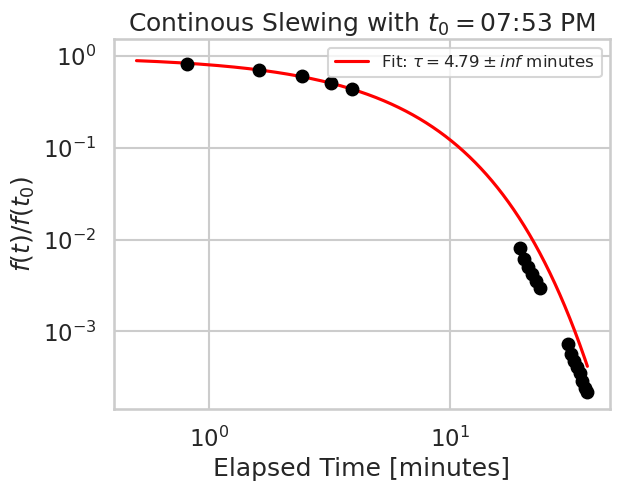

In [284]:
time_fit = np.linspace(0.5, max(x/60), 1000)
flux_fit = exp_decay(time_fit, *popt)

t0 = continous[0]['date'].strftime('%I:%M %p')
plt.errorbar(x/60, y, yerr=yErr, color='k', fmt='o')
plt.plot(time_fit, flux_fit, label=f'Fit: $\\tau = {tau_fit:.2f} \pm {tau_err:.2f}$ minutes', color='red')
plt.legend(fontsize=12)
plt.loglog()
plt.ylabel(r'$f(t)/f(t_0)$')
plt.xlabel('Elapsed Time [minutes]')
plt.title(f"Continous Slewing with $t_0=${t0}")
print(f"Fitted tau: {tau_fit:.4f} ± {tau_err:.4f} seconds")

## Mount Information

In [56]:
d = np.load('/home/estevesjh/Documents/twilightMonitor/DATA/mount/202410/mount_pointing_20241001_6.npz')
d['slew_angle']

array([76.86364, 88.93654, 80.70189, 70.22856, 61.13721, 50.97524,
       41.71776])

In [76]:
import glob
mFiles = glob.glob('/home/estevesjh/Documents/twilightMonitor/DATA/mount/202410/mount_pointing_20241001*')

mountDatas = []
for mfile in mFiles:
    d = np.load(mfile)
    mountDatas.append(d)

In [77]:
mountSlewRate = []
for mdata in mountDatas:
    mountSlewRate.append(mdata['slew_rate'])
mountSlewRate = np.array(mountSlewRate)

In [84]:
meanSlewRate = np.median(mountSlewRate)
print(f"The mean slew rate is {meanSlewRate:0.2f} deg/sec")

The mean slew rate is -4.04 deg/sec


In [301]:
popt

array([4.79380076, 0.98968839])